## Figure 5 - Distribution of depths of shallow sources at Shinmoe-dake and Iwo-yama

In [1]:
%matplotlib inline
import os
from datetime import timedelta, datetime as dt
import h5py
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt, ticker, dates as mdates
from mintpy.utils import ptime, readfile, writefile, utils as ut, plot as pp
from mintpy.defaults.plot import *

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/depths_PDF')
os.chdir(work_dir)
print('Go to directory', work_dir)

Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/depths_PDF


In [2]:
## Utilities function
model_code2name = {
    'C' : 'CDMN',
    'C2': 'CDM2',
    'T' : 'MCTG',
}

def get_GBIS_mKeep(inv_file, par_name, burning=3e4, blankCells=9999, offset=0, scale=1):
    """ Get the estimation of the parameter
    Parameters: inv_file : GBIS inversion result mat file
                par_index : index of the parameter, starting from 0
                burning : number of iterations to ignore in pdf histogram plot
                blankCells : Number of empty cells at the end of mKeep and pKeep
                offset : reference height
    Returns:    mKeep : 1D np.ndarray of all the estimation of the parameter
                optimal : the optional value
    """
    mat = sio.loadmat(inv_file, struct_as_record=False, squeeze_me=True)
    par_idx = list(mat['invResults'].model.parName).index(par_name)
    mKeep = mat['invResults'].mKeep[par_idx, int(burning):-blankCells]
    optimal = mat['invResults'].model.optimal[par_idx]

    # if parameter is depth
    if 'Depth' in par_name:
        mKeep -= offset
        mKeep *= -1       # a.s.l.

        optimal -= offset
        optimal *= -1

    mKeep *= scale
    optimal *= scale
    return mKeep, optimal
print('Utilities function intiated.')

Utilities function intiated.


save figure to /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/depths_PDF/depths_PDF.png


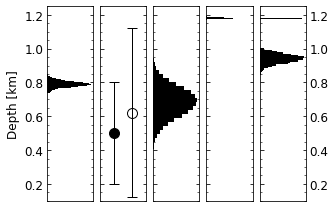

In [5]:
## plot

# inversion result dir
inv_res_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/GBIS')

# inversion dataset
ds_list = [
    'Shinmoe2008post/invert_1_2_C',
    'Shinmoe2017pre/invert_1_2_T',
    'Iwo2017pre/invert_1_2_C',
    'Iwo2017post/invert_1_2_C_C2',
]

colors = [pp.mplColors[0], pp.mplColors[1], pp.mplColors[2], pp.mplColors[3]]
axIdx = [0,2,3,4]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=[4, 3], sharey=True)
for i in range(len(ds_list)):
    ds_name = ds_list[i]
    ax = axs[axIdx[i]]
    c = colors[i]

    inv_file = ds_name.split('/')[1]
    inv_file = os.path.join(inv_res_dir, ds_name, inv_file)
    
    # read GBIS data
    model_code = ds_name.split('invert_1_2_')[1].split('_')[-1]
    model_name = model_code2name[model_code]
    par_name = '{} Depth'.format(model_name)
    
    depths, depthO = get_GBIS_mKeep(inv_file, par_name=par_name, burning=3e4, scale=0.001)
    dmin = np.nanmean(depths) - 4 * np.nanstd(depths)
    dmax = np.nanmean(depths) + 4 * np.nanstd(depths)

    # plot
    ax.hist(depths, bins=30, range=(dmin, dmax), color='k', orientation='horizontal', density=True)
    if ds_name == 'Iwo2017post/invert_1_2_C_C2':
        depthO = get_GBIS_mKeep(inv_file, par_name='CDMN Depth', burning=3e4, scale=0.001)[1]
        ax.axhline(y=depthO, xmax=0.9, c='k', linestyle='-', linewidth=1)

# depths from other literacture
ax = axs[1]
ax.errorbar(x=0.3, y=0.50, yerr=0.3, fmt='o', fillstyle='full', ms='10', color='k', elinewidth=1, capsize=5)
ax.errorbar(x=0.7, y=0.62, yerr=0.5, fmt='o', fillstyle='none', ms='10', color='k', elinewidth=1, capsize=5)
ax.set_xlim(0,1)

# axis format
for ax in axs:
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.200))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.050))
    ax.set_xticks([])
    ax.set_ylim(0.10, 1.25)
axs[0].set_ylabel('Depth [km]', fontsize=font_size)
axs[-1].tick_params(labelright=True)
fig.subplots_adjust(wspace=0.15, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('depths_PDF.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()

save figure to /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/depths_PDF/timeline.png


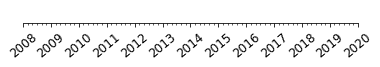

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6,0.3])

ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(which='both', direction='out', rotation=40, labelsize=font_size, bottom=True, top=False, left=False, right=False)
ax.set_xlim(dt(2008, 1, 1), dt(2020, 1, 1))

# xaxis format
ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=2))

# output
out_file = os.path.abspath('timeline.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()